# DATA VISUALIZATION CASESTUDY 01

## GROUP 16 - AASHIKA B S (CB.SC.I5DAS19003)
##                      ANN MARIA WILSON (CB.SC.I5DAS19009)

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from matplotlib import cm

In [31]:
import pandas as pd
df=pd.read_csv(r"D:\SEM 6\Data Visualization\CASE STUDY 1\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [32]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16820,Injustice: Gods Among Us,PSV,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.09,0.00,0.00,0.03,0.13,NaN,NaN,NaN,NaN,NaN,NaN
16821,Fatal Inertia,X360,2007.0,Racing,Tecmo Koei,0.12,0.00,0.00,0.01,0.13,61.0,30.0,4.2,19.0,Koei,E10+
16822,Over the Hedge: Hammy Goes Nuts!,DS,2006.0,Platform,Activision,0.12,0.00,0.00,0.01,0.13,NaN,NaN,NaN,NaN,NaN,NaN
16823,Phantom Brave: We Meet Again,Wii,2009.0,Role-Playing,Nippon Ichi Software,0.12,0.00,0.01,0.01,0.13,76.0,12.0,7.1,15.0,Nippon Ichi Software,T


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16825 entries, 0 to 16824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16823 non-null  object 
 1   Platform         16825 non-null  object 
 2   Year_of_Release  16553 non-null  float64
 3   Genre            16823 non-null  object 
 4   Publisher        16770 non-null  object 
 5   NA_Sales         16825 non-null  float64
 6   EU_Sales         16825 non-null  float64
 7   JP_Sales         16825 non-null  float64
 8   Other_Sales      16825 non-null  float64
 9   Global_Sales     16825 non-null  float64
 10  Critic_Score     8180 non-null   float64
 11  Critic_Count     8180 non-null   float64
 12  User_Score       10084 non-null  object 
 13  User_Count       7626 non-null   float64
 14  Developer        10163 non-null  object 
 15  Rating           10017 non-null  object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


In [34]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [35]:
df["User_Score"] = df["User_Score"].replace("tbd", np.nan).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16825 entries, 0 to 16824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16823 non-null  object 
 1   Platform         16825 non-null  object 
 2   Year_of_Release  16553 non-null  float64
 3   Genre            16823 non-null  object 
 4   Publisher        16770 non-null  object 
 5   NA_Sales         16825 non-null  float64
 6   EU_Sales         16825 non-null  float64
 7   JP_Sales         16825 non-null  float64
 8   Other_Sales      16825 non-null  float64
 9   Global_Sales     16825 non-null  float64
 10  Critic_Score     8180 non-null   float64
 11  Critic_Count     8180 non-null   float64
 12  User_Score       7626 non-null   float64
 13  User_Count       7626 non-null   float64
 14  Developer        10163 non-null  object 
 15  Rating           10017 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


In [36]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16553.000000,16825.000000,16825.000000,16825.000000,16825.000000,16825.000000,8180.000000,8180.000000,7626.000000,7626.000000
mean,2006.486800,0.271201,0.149167,0.080539,0.048897,0.550034,68.893643,26.279340,7.118516,158.273407
std,5.871856,0.894780,0.545190,0.334195,0.211528,1.702943,13.932327,18.939801,1.500127,545.133810
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.230000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,80.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [37]:
df.shape

(16825, 16)

## DUPLICATE VALUES

In [38]:
df.duplicated().sum()

336

In [39]:
df.drop_duplicates(inplace=True)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16719,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16720,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.shape

(16489, 16)

## HANDLING NULL VALUES

In [41]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8498
Critic_Count       8498
User_Score         9046
User_Count         9046
Developer          6547
Rating             6693
dtype: int64

<AxesSubplot:>

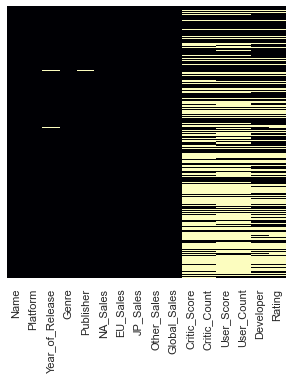

In [42]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="magma")

In [43]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(3)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [44]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
User_Score,9046,54.861
User_Count,9046,54.861
Critic_Score,8498,51.537
Critic_Count,8498,51.537
Rating,6693,40.591
Developer,6547,39.705
Year_of_Release,269,1.631
Publisher,54,0.327
Name,2,0.012
Genre,2,0.012


In [45]:
df=df.dropna(subset=["Name","Genre","Publisher","Year_of_Release"],axis=0).copy()

In [46]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8872,54.813
User_Count,8872,54.813
Critic_Score,8350,51.588
Critic_Count,8350,51.588
Rating,6573,40.609
Developer,6436,39.763


In [47]:
dev=(df["Developer"].mode())[0]
rate=(df["Rating"].mode())[0]
print("Mode of Developer :",dev)
print("Mode of Rating :",rate)
df["Developer"].fillna((df["Developer"].mode())[0],inplace=True)
df["Rating"].fillna((df["Rating"].mode())[0],inplace=True)
print()
missing_values_table(df)

Mode of Developer : Ubisoft
Mode of Rating : E

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8872,54.813
User_Count,8872,54.813
Critic_Score,8350,51.588
Critic_Count,8350,51.588


In [48]:
us=df["User_Score"].mean()
uc=df["User_Count"].mean()
cs=df["Critic_Score"].mean()
cc=df["Critic_Count"].mean()
print("Mean of User_Score :",us)
print("Mean of User_Count :",uc)
print("Mean of Critic_Score :",cs)
print("Mean of Critic_Count :",cc)

Mean of User_Score : 7.116133442712647
Mean of User_Count : 156.67227235438884
Mean of Critic_Score : 68.81214905564063
Mean of Critic_Count : 26.168198060234815


In [49]:
df["User_Score"].fillna(df["User_Score"].mean(),inplace=True)
df["User_Count"].fillna(df["User_Count"].mean(),inplace=True)
df["Critic_Score"].fillna(df["Critic_Score"].mean(),inplace=True)
df["Critic_Count"].fillna(df["Critic_Count"].mean(),inplace=True)

In [50]:
missing_values_table(df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## OUTLIERS

In [51]:
def outlier(data):
    print(data.describe())
    sns.set(rc={'figure.figsize':(5,5)})
    sns.boxplot(x=data)
    plt.show()
    a=data.quantile(0.25)
    b=data.quantile(0.75)
    print(f"Q1:{a},Q3:{b}")
    iqr=b-a
    print("IQR :",iqr)
    l=a-(1.5*iqr)
    u=b+(1.5*iqr)
    print(f"RANGE IS ({l},{u})")
    tenth_percentile = np.percentile(data, 25)
    ninetieth_percentile = np.percentile(data, 80)
    data.mask(data<tenth_percentile, tenth_percentile, inplace=True)
    data.mask(data>ninetieth_percentile, ninetieth_percentile, inplace=True)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.boxplot(x=data)
    plt.show()
    print(data.describe())

count    16186.000000
mean         0.253973
std          0.818534
min          0.000000
25%          0.000000
50%          0.070000
75%          0.220000
max         41.360000
Name: NA_Sales, dtype: float64


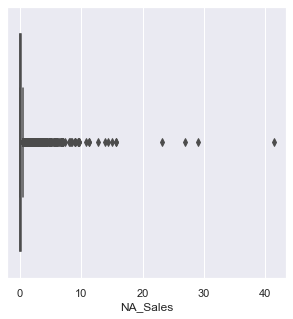

Q1:0.0,Q3:0.22
IQR : 0.22
RANGE IS (-0.33,0.55)


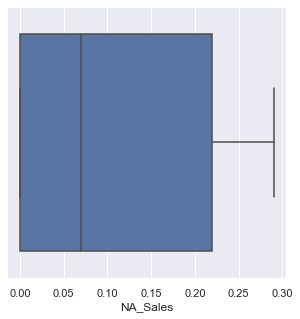

count    16186.000000
mean         0.113063
std          0.112671
min          0.000000
25%          0.000000
50%          0.070000
75%          0.220000
max          0.290000
Name: NA_Sales, dtype: float64


In [52]:
outlier(df['NA_Sales'])

count    16186.000000
mean         0.140129
std          0.506115
min          0.000000
25%          0.000000
50%          0.020000
75%          0.100000
max         28.960000
Name: EU_Sales, dtype: float64


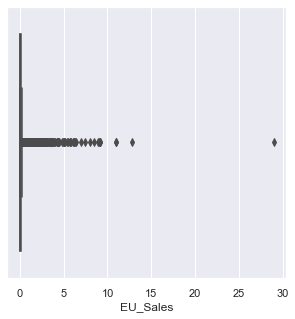

Q1:0.0,Q3:0.1
IQR : 0.1
RANGE IS (-0.15000000000000002,0.25)


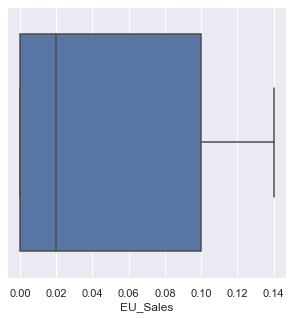

count    16186.000000
mean         0.048656
std          0.055627
min          0.000000
25%          0.000000
50%          0.020000
75%          0.100000
max          0.140000
Name: EU_Sales, dtype: float64


In [53]:
outlier(df['EU_Sales'])

count    16186.000000
mean         0.076528
std          0.308310
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64


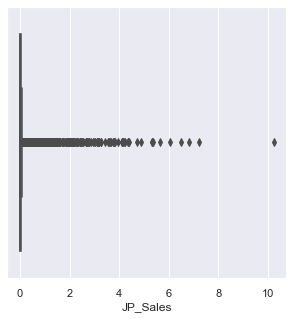

Q1:0.0,Q3:0.04
IQR : 0.04
RANGE IS (-0.06,0.1)


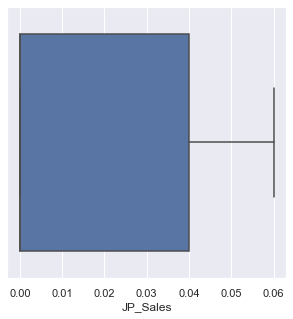

count    16186.000000
mean         0.016707
std          0.024664
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max          0.060000
Name: JP_Sales, dtype: float64


In [54]:
outlier(df['JP_Sales'])

count    16186.000000
mean         0.045782
std          0.187781
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_Sales, dtype: float64


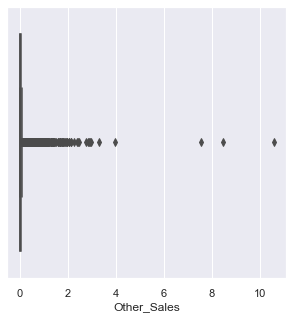

Q1:0.0,Q3:0.03
IQR : 0.03
RANGE IS (-0.045,0.075)


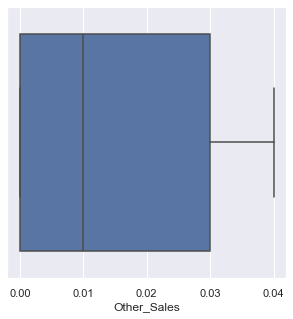

count    16186.000000
mean         0.015227
std          0.016080
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max          0.040000
Name: Other_Sales, dtype: float64


In [55]:
outlier(df['Other_Sales'])

count    16186.000000
mean         0.516655
std          1.560073
min          0.010000
25%          0.060000
50%          0.160000
75%          0.450000
max         82.530000
Name: Global_Sales, dtype: float64


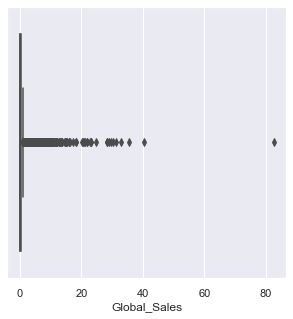

Q1:0.06,Q3:0.45
IQR : 0.39
RANGE IS (-0.5249999999999999,1.035)


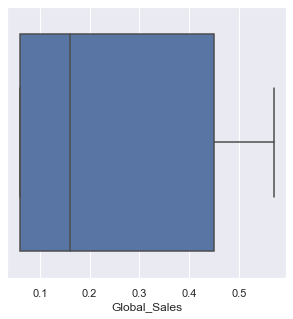

count    16186.000000
mean         0.250334
std          0.200557
min          0.060000
25%          0.060000
50%          0.160000
75%          0.450000
max          0.570000
Name: Global_Sales, dtype: float64


In [56]:
outlier(df['Global_Sales'])

count    16186.000000
mean        68.812149
std          9.659420
min         13.000000
25%         68.812149
50%         68.812149
75%         70.000000
max         98.000000
Name: Critic_Score, dtype: float64


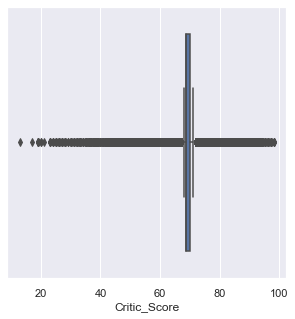

Q1:68.81214905564063,Q3:70.0
IQR : 1.1878509443593686
RANGE IS (67.03037263910159,71.78177641653906)


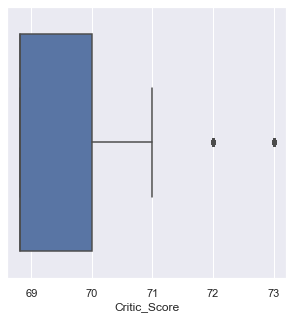

count    16186.000000
mean        69.804367
std          1.731575
min         68.812149
25%         68.812149
50%         68.812149
75%         70.000000
max         73.000000
Name: Critic_Score, dtype: float64


In [57]:
outlier(df['Critic_Score'])

count    16186.000000
mean        26.168198
std         13.097883
min          3.000000
25%         22.000000
50%         26.168198
75%         26.168198
max        113.000000
Name: Critic_Count, dtype: float64


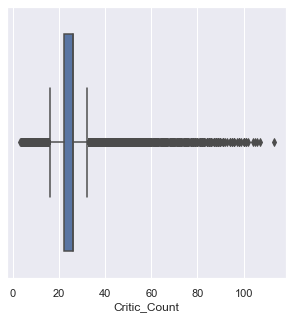

Q1:22.0,Q3:26.168198060234815
IQR : 4.168198060234815
RANGE IS (15.747702909647778,32.42049515058704)


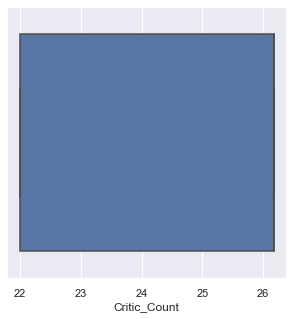

count    16186.000000
mean        25.037760
std          1.822537
min         22.000000
25%         22.000000
50%         26.168198
75%         26.168198
max         26.168198
Name: Critic_Count, dtype: float64


In [58]:
outlier(df['Critic_Count'])

count    16186.000000
mean         7.116133
std          1.007959
min          0.000000
25%          7.116133
50%          7.116133
75%          7.300000
max          9.700000
Name: User_Score, dtype: float64


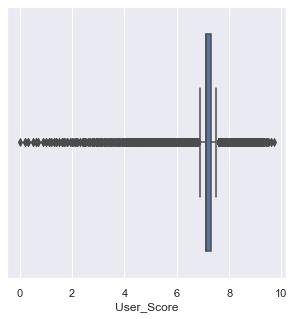

Q1:7.116133442712647,Q3:7.3
IQR : 0.18386655728735324
RANGE IS (6.840333606781616,7.575799835931029)


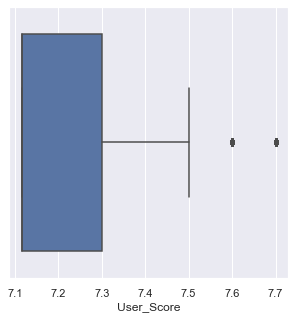

count    16186.000000
mean         7.252596
std          0.238101
min          7.116133
25%          7.116133
50%          7.116133
75%          7.300000
max          7.700000
Name: User_Score, dtype: float64


In [59]:
outlier(df['User_Score'])

count    16186.000000
mean       156.672272
std        367.255653
min          4.000000
25%         29.000000
50%        156.672272
75%        156.672272
max      10665.000000
Name: User_Count, dtype: float64


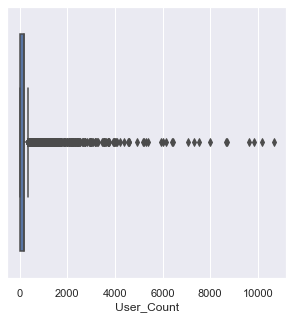

Q1:29.0,Q3:156.67227235438884
IQR : 127.67227235438884
RANGE IS (-162.50840853158326,348.1806808859721)


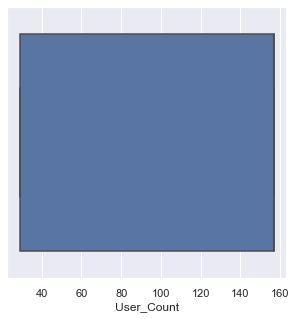

count    16186.000000
mean       113.130906
std         57.945125
min         29.000000
25%         29.000000
50%        156.672272
75%        156.672272
max        156.672272
Name: User_Count, dtype: float64


In [60]:
outlier(df['User_Count'])

## NORMALISING THE VALUES

In [80]:
A=df.copy()

In [81]:
def norm(data):
    l=min(data)
    u=max(data)
    normalized_val=[]
    for i in data:
      normalized_val.append((i-l)/(u-l))
    data.replace(normalized_val, inplace=True)
    return data

In [82]:
norm(A['EU_Sales'])

0        0.14
1        0.14
2        0.14
3        0.14
4        0.14
         ... 
16717    0.01
16718    0.01
16719    0.01
16720    0.01
16721    0.01
Name: EU_Sales, Length: 16186, dtype: float64

In [83]:
norm(A['NA_Sales'])

0        0.29
1        0.29
2        0.29
3        0.29
4        0.29
         ... 
16717    0.01
16718    0.01
16719    0.01
16720    0.01
16721    0.01
Name: NA_Sales, Length: 16186, dtype: float64

In [84]:
norm(A['JP_Sales'])

0        0.06
1        0.06
2        0.06
3        0.06
4        0.06
         ... 
16717    0.01
16718    0.01
16719    0.01
16720    0.01
16721    0.01
Name: JP_Sales, Length: 16186, dtype: float64

In [85]:
norm(A['Other_Sales'])

0        0.04
1        0.04
2        0.04
3        0.04
4        0.04
         ... 
16717    0.01
16718    0.01
16719    0.01
16720    0.01
16721    0.01
Name: Other_Sales, Length: 16186, dtype: float64

In [86]:
norm(A['Global_Sales'])

0        0.57
1        0.57
2        0.57
3        0.57
4        0.57
         ... 
16717    0.06
16718    0.06
16719    0.06
16720    0.06
16721    0.06
Name: Global_Sales, Length: 16186, dtype: float64

In [87]:
norm(A['Critic_Score'])

0        73.000000
1        68.812149
2        73.000000
3        73.000000
4        68.812149
           ...    
16717    68.812149
16718    68.812149
16719    68.812149
16720    68.812149
16721    68.812149
Name: Critic_Score, Length: 16186, dtype: float64

In [88]:
norm(A['Critic_Count'])

0        26.168198
1        26.168198
2        26.168198
3        26.168198
4        26.168198
           ...    
16717    26.168198
16718    26.168198
16719    26.168198
16720    26.168198
16721    26.168198
Name: Critic_Count, Length: 16186, dtype: float64

In [89]:
norm(A['User_Score'])

0        7.700000
1        7.116133
2        7.700000
3        7.700000
4        7.116133
           ...   
16717    7.116133
16718    7.116133
16719    7.116133
16720    7.116133
16721    7.116133
Name: User_Score, Length: 16186, dtype: float64

In [90]:
norm(A['User_Count'])

0        156.672272
1        156.672272
2        156.672272
3        156.672272
4        156.672272
            ...    
16717    156.672272
16718    156.672272
16719    156.672272
16720    156.672272
16721    156.672272
Name: User_Count, Length: 16186, dtype: float64

## ENCODING CATEGORICAL VARIABLES

In [91]:
encoder=ce.OneHotEncoder(cols='Rating',handle_unknown='return_nan',return_df=True,use_cat_names=True)
A=encoder.fit_transform(A)
A

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,User_Count,Developer,Rating_E,Rating_M,Rating_T,Rating_E10+,Rating_K-A,Rating_AO,Rating_EC,Rating_RP
0,Wii Sports,Wii,2006.0,Sports,Nintendo,0.29,0.14,0.06,0.04,0.57,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.29,0.14,0.06,0.04,0.57,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,0.29,0.14,0.06,0.04,0.57,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,0.29,0.14,0.06,0.04,0.57,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,0.29,0.14,0.06,0.04,0.57,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.01,0.01,0.01,0.01,0.06,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16718,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.01,0.01,0.01,0.01,0.06,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16719,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.01,0.01,0.01,0.01,0.06,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16720,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.01,0.01,0.01,0.06,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
encoder=ce.OneHotEncoder(cols='Genre',handle_unknown='return_nan',return_df=True,use_cat_names=True)
A=encoder.fit_transform(A)
A

,Name,Platform,Year_of_Release,Genre_Sports,Genre_Platform,Genre_Racing,Genre_Role-Playing,Genre_Puzzle,Genre_Misc,Genre_Shooter,...,User_Count,Developer,Rating_E,Rating_M,Rating_T,Rating_E10+,Rating_K-A,Rating_AO,Rating_EC,Rating_RP
0,Wii Sports,Wii,2006.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super Mario Bros.,NES,1985.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Wii,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,Samurai Warriors: Sanada Maru,PS3,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16718,LMA Manager 2007,X360,2006.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16719,Haitaka no Psychedelica,PSV,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16720,Spirits & Spells,GBA,2003.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
encoder=ce.OneHotEncoder(cols='Platform',handle_unknown='return_nan',return_df=True,use_cat_names=True)
A=encoder.fit_transform(A)
A

,Name,Platform_Wii,Platform_NES,Platform_GB,Platform_DS,Platform_X360,Platform_PS3,Platform_PS2,Platform_SNES,Platform_GBA,...,User_Count,Developer,Rating_E,Rating_M,Rating_T,Rating_E10+,Rating_K-A,Rating_AO,Rating_EC,Rating_RP
0,Wii Sports,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Super Mario Bros.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Nintendo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16717,Samurai Warriors: Sanada Maru,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16718,LMA Manager 2007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16719,Haitaka no Psychedelica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16720,Spirits & Spells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,156.672272,Ubisoft,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
A.columns

Index(['Name', 'Platform_Wii', 'Platform_NES', 'Platform_GB', 'Platform_DS',
       'Platform_X360', 'Platform_PS3', 'Platform_PS2', 'Platform_SNES',
       'Platform_GBA', 'Platform_PS4', 'Platform_3DS', 'Platform_N64',
       'Platform_PS', 'Platform_XB', 'Platform_PC', 'Platform_2600',
       'Platform_PSP', 'Platform_XOne', 'Platform_WiiU', 'Platform_GC',
       'Platform_GEN', 'Platform_DC', 'Platform_PSV', 'Platform_SAT',
       'Platform_SCD', 'Platform_WS', 'Platform_NG', 'Platform_TG16',
       'Platform_3DO', 'Platform_GG', 'Platform_PCFX', 'Year_of_Release',
       'Genre_Sports', 'Genre_Platform', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Puzzle', 'Genre_Misc', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Action', 'Genre_Fighting', 'Genre_Adventure', 'Genre_Strategy',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating_E', 'Rating

## EDA

## UNIVARIATE ANALYSIS

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

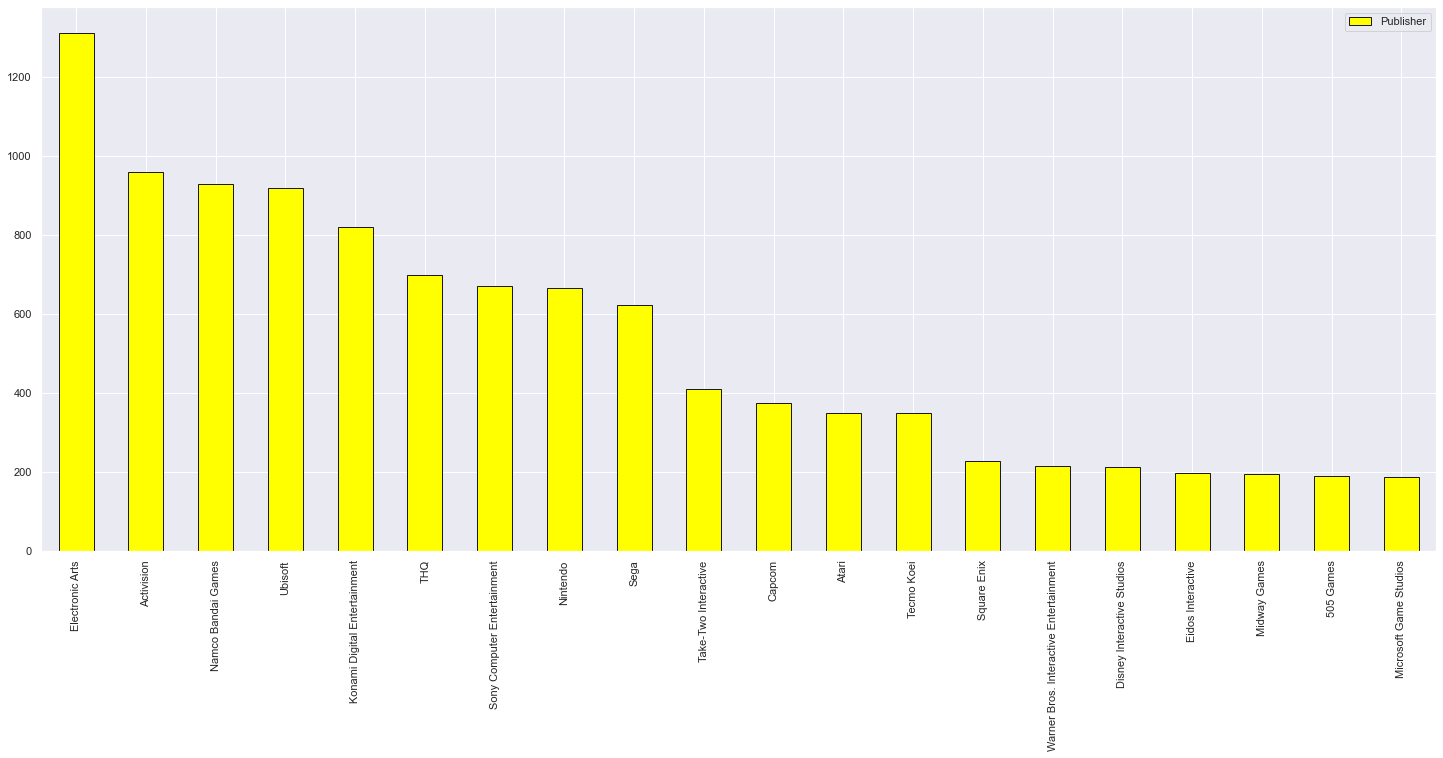

In [95]:
a=df['Publisher'].value_counts()
a1=pd.DataFrame(a).head(20)
fig=plt.figure(figsize=(10,10))
a1.plot.bar(color='yellow',edgecolor='k')

## INFERENCE: THE PUBLISHER ELECTRONIC ARTS HAVE HIGHER SALES OF GAMES COMPARED TO OTHER PUBLISHERS

<AxesSubplot:>

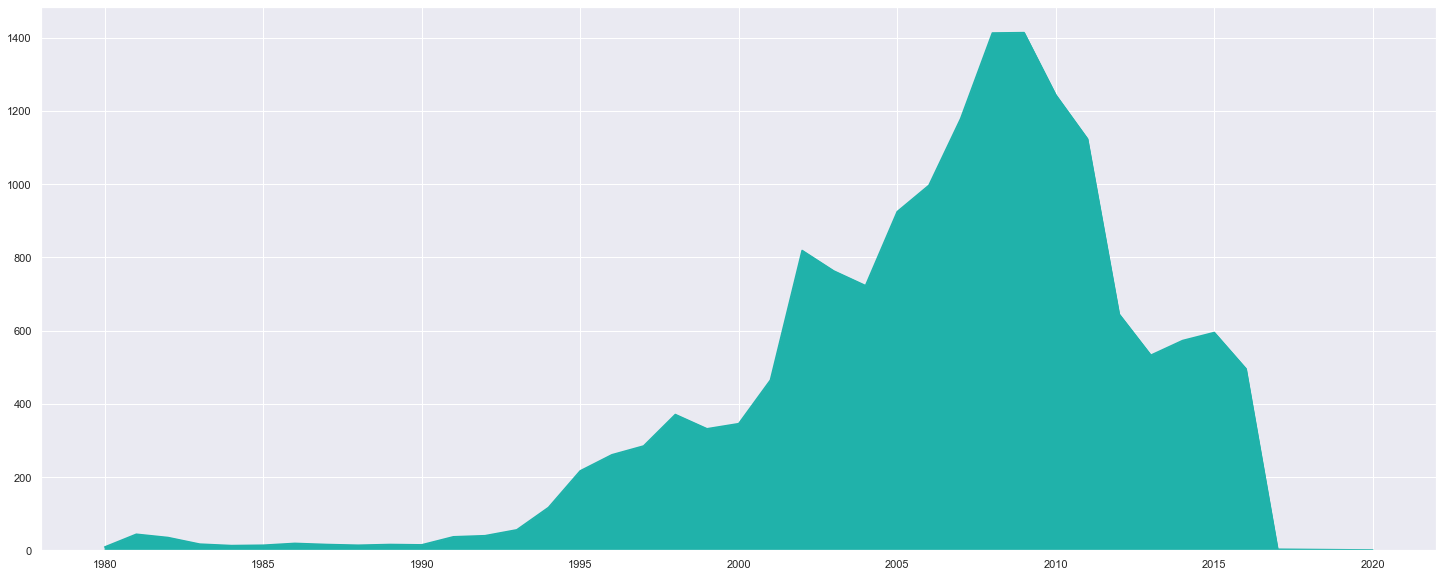

In [97]:
df['Year_of_Release'].value_counts().sort_index().plot.area(color='lightseagreen')

## GAME SALES IS HIGHEST IN THE YEAR RANGE OF 2009 - 2010 AND ITS COMPARATIVELY LOWER IN 1980 - 1993

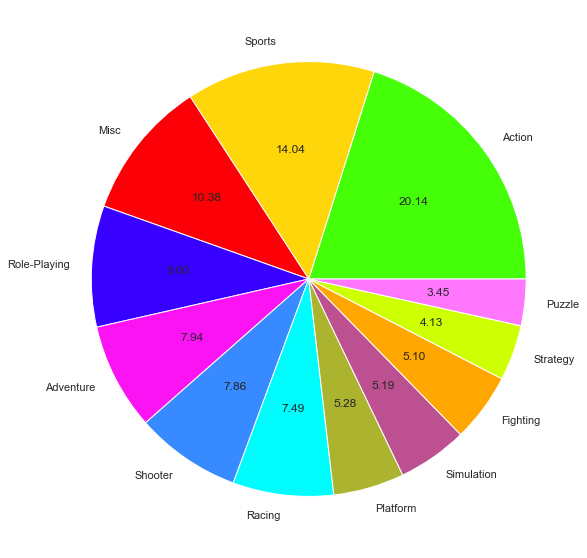

In [99]:
cs=['#44FF07','#FED60A','#FB0007','#3700FF','#FB13F3','#378AFF','#00FDFD','#ACB32F','#BC5090','#FFA600','#CEFF03','#FF77FD']
p=plt.pie(df['Genre'].value_counts(),autopct='%.2f',colors=cs,labels=['Action','Sports','Misc','Role-Playing','Adventure','Shooter',
                                                                   'Racing','Platform','Simulation','Fighting','Strategy','Puzzle'])
plt.show()

## INFERENCE : DISTRIBUTION OF GENRES WHERE ACTION HAS MOST OF THE GAMES AND PUZZLE HAS LOWER NUMBER OF GAMES.

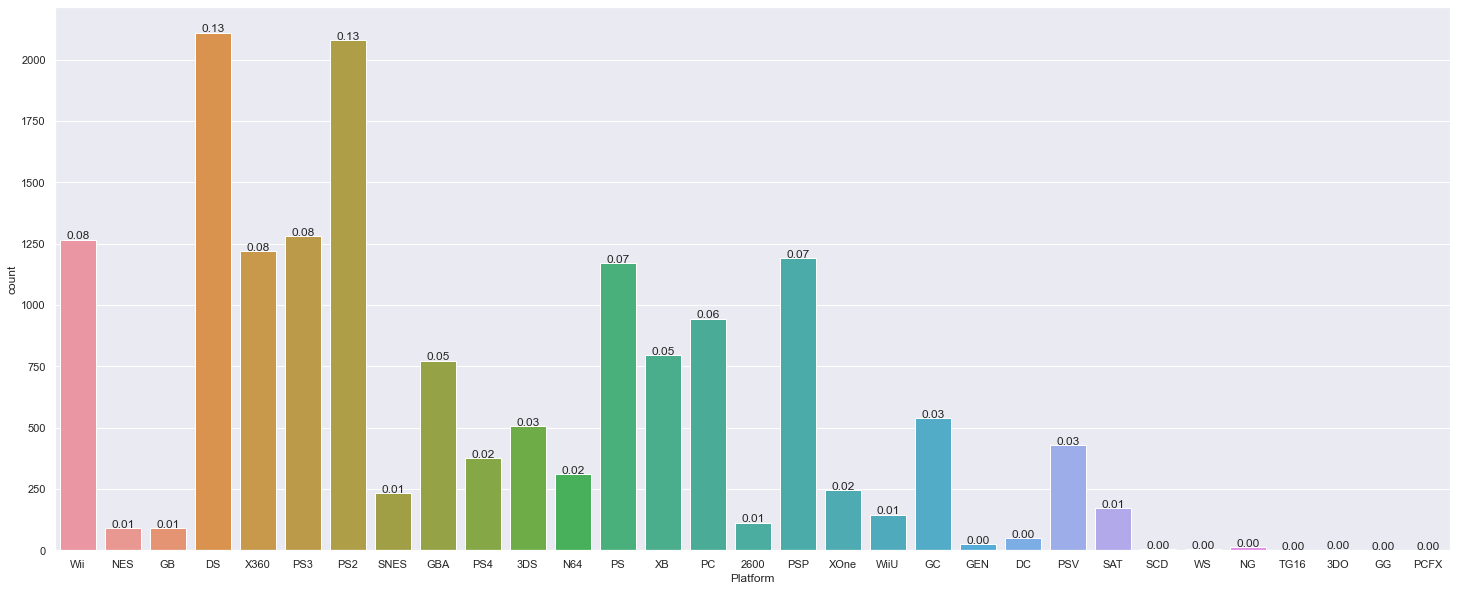

In [101]:
genre=df.groupby('Platform')
total = float(len(df)) 
ax = sns.countplot(x="Platform", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## INFERENCE: THE MOST COMMON PLATFORM USED IN THE GAME IS DS AND PS2, WHEREAS THE LEAST COMMON IS NG

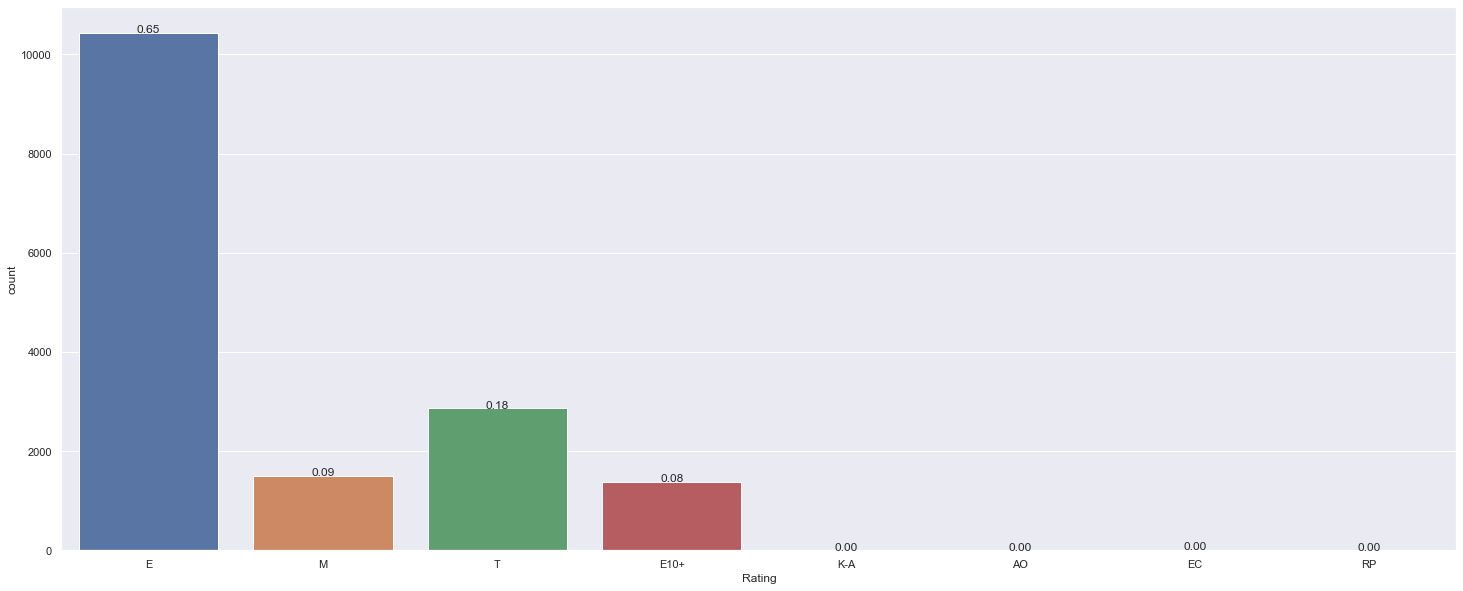

In [103]:
rating=df.groupby('Rating')
total = float(len(df)) 
ax = sns.countplot(x="Rating", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

## INFERENCE: THERE ARE MORE NUMBER OF GAMES WITH 'E' RATING

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Genre', ylabel='User_Count'>

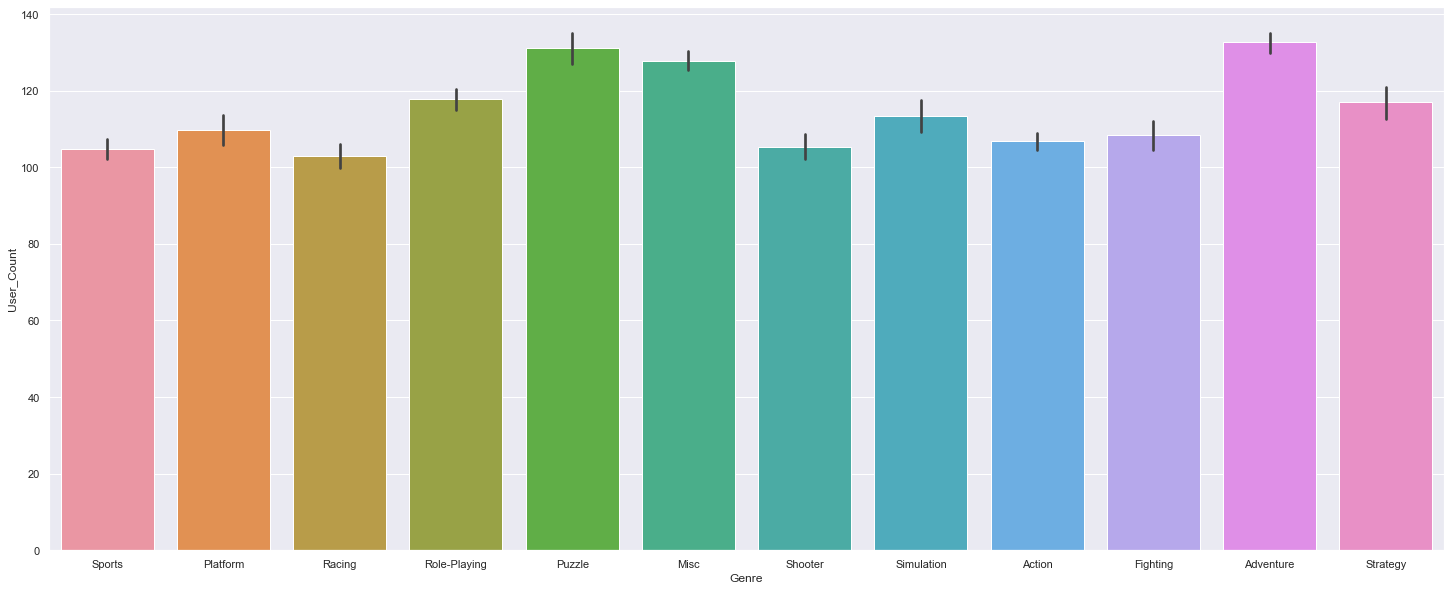

In [105]:
sns.barplot(data=df,x='Genre',y='User_Count')

## INFERENCE : THE NUMBER OF USERS WHO OPT FOR ADVENTURE GENRE IS HIGHEST AND RACING IS LOWEST.

<AxesSubplot:xlabel='User_Score', ylabel='Density'>

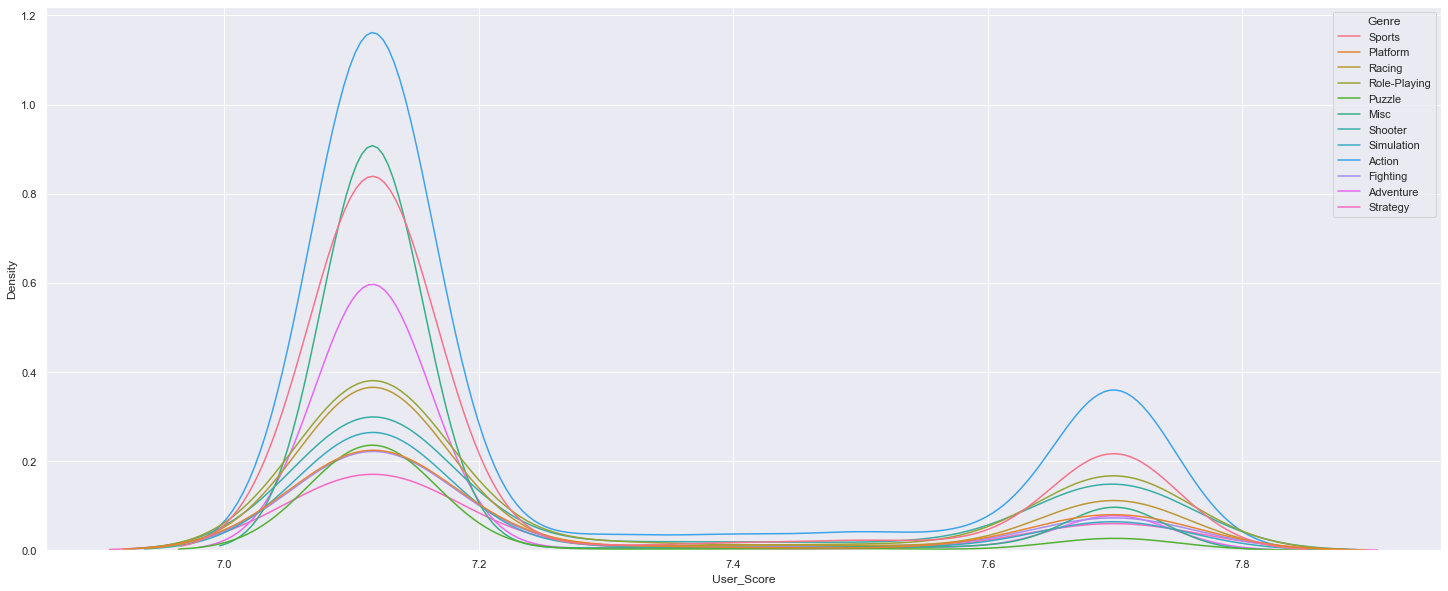

In [107]:
sns.kdeplot(data=df,x='User_Score',hue='Genre')

## INFERENCE: THE SCORES GIVEN BY THE USERS ARE COMPARATIVELY HIGHER FOR ACTION GENRE AND IT IS LOWEST FOR THE PUZZLE GENRE

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

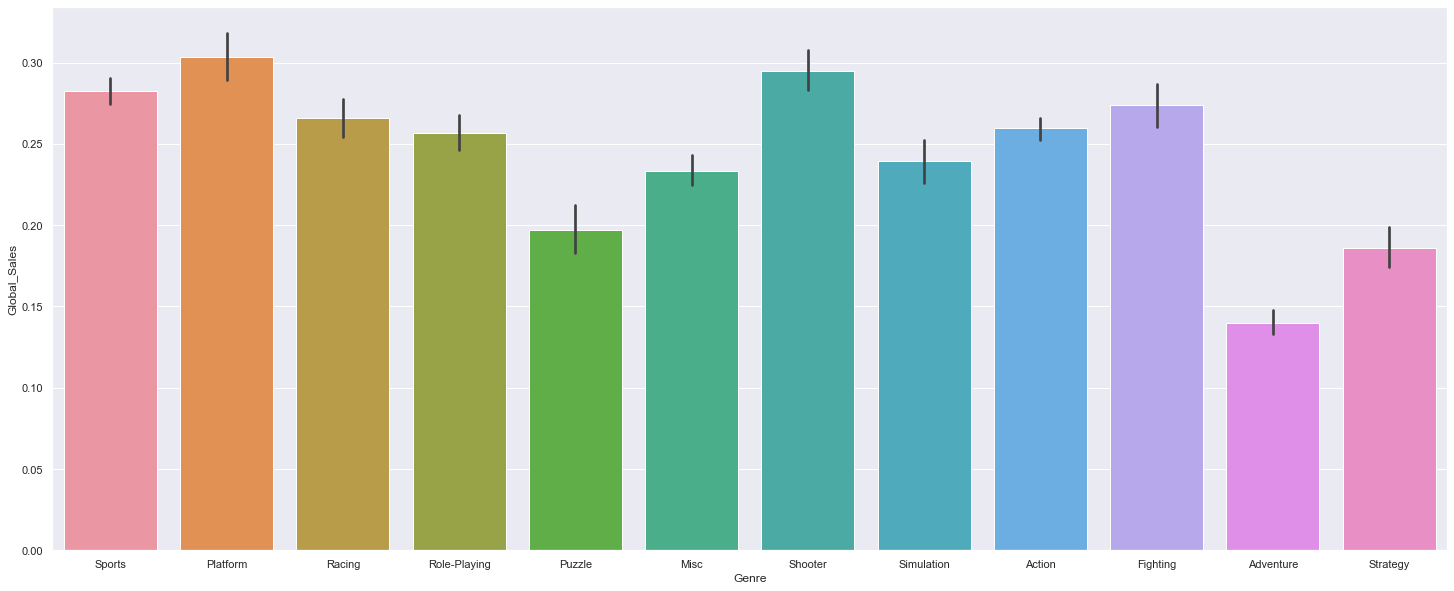

In [109]:
sns.barplot(data=df,x='Genre',y='Global_Sales')

## INFERENCE : THE GAMES WHICH ARE PLAYED IN THE PLATFORM GENRE WITH REAL CHARACTERS HAVE RECEIVED A GOOD RESPONSE AMONG THE USERS AND MOST PEOPLE OPTED FOR IT

<AxesSubplot:xlabel='Year_of_Release', ylabel='NA_Sales'>

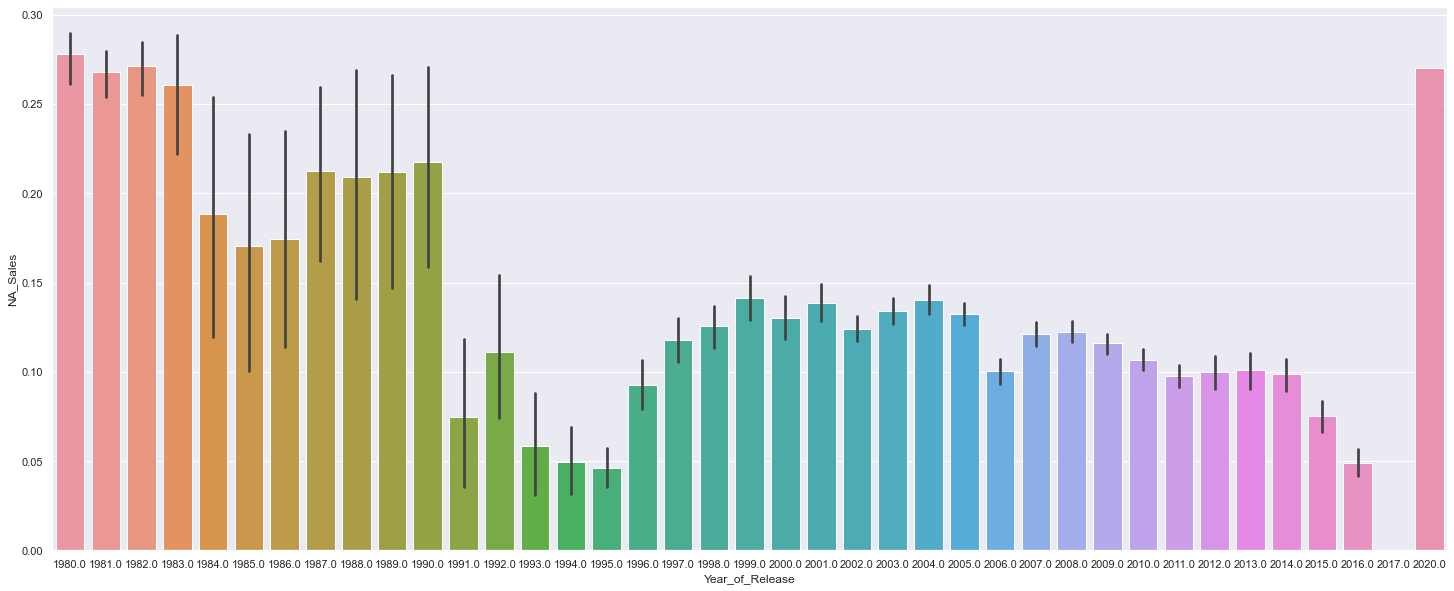

In [111]:
sns.barplot(x='Year_of_Release',y='NA_Sales',data=df)

## THE SALES OF NORTH AMERICA WAS COMPARATIVELY HIGHER IN THE YEAR OF 1980-1984 AND IT BECAME COMPARATIVELY LOWER AS IT PASSES DOWN. ALSO,THERE WAS NO SALES IN THE YEAR 2017

C:\Users\aashi\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


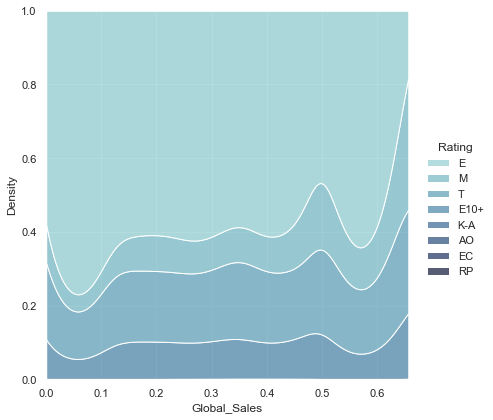

In [113]:
sns.displot(
    data=df,
    x="Global_Sales", hue="Rating",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

## AREA OF EVERYONE RATING HAVE MORE GLOBAL SCALES AND KIDS&ADULTS RATING HAS THE MINIMUM GLOBAL SALES. ALSO, THERE ARE SOME GAMES LIKE ADULT ONLY, EARLY CHILDHOOD HAVE NO SALES

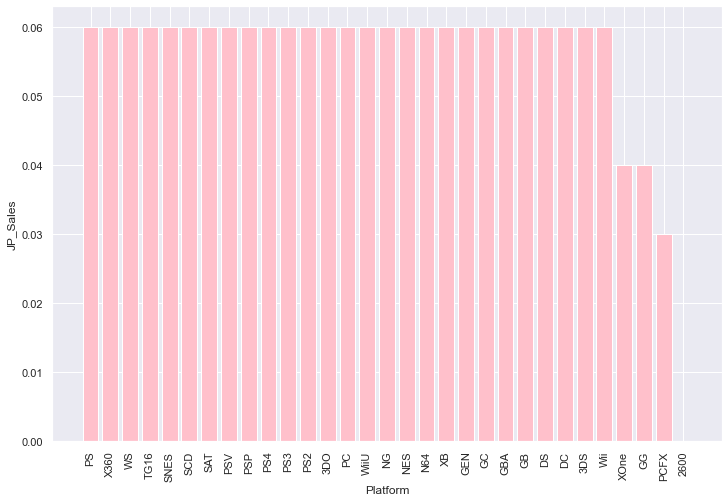

In [115]:
df1=df.groupby(['Platform'], as_index=False)['JP_Sales'].max().sort_values('JP_Sales', ascending=False)
plt.figure(figsize=(12,8))
plt.bar('Platform','JP_Sales',data=df1,color='pink')
plt.xlabel('Platform')
plt.ylabel('JP_Sales')
plt.xticks(rotation=90)
plt.show()

## INFERENCE:SALES OF GAMES THAT ARE PLAYED IN PCFX PLATFORM IS LOWER THAN OTHERS, WHEREAS MOST PLATFORMS HAVE EQUAL SALES IN ALL PLATFORM IN JAPAN

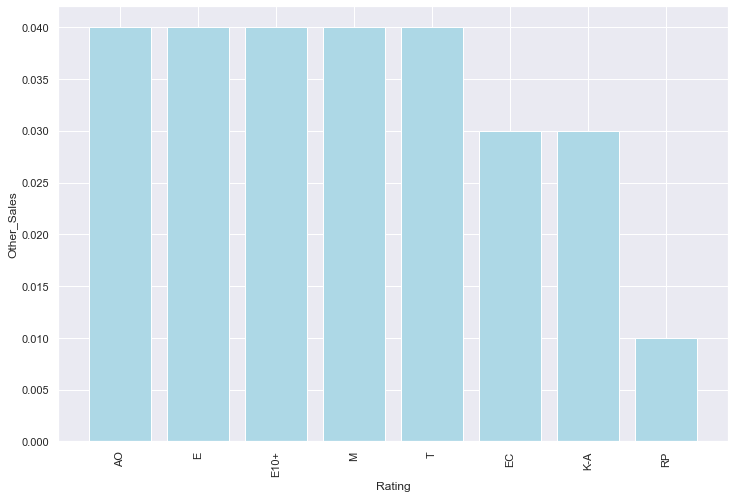

In [117]:
df1=df.groupby(['Rating'], as_index=False)['Other_Sales'].max().sort_values('Other_Sales', ascending=False)
plt.figure(figsize=(12,8))
plt.bar('Rating','Other_Sales',data=df1,color='lightblue')
plt.xlabel('Rating')
plt.ylabel('Other_Sales')
plt.xticks(rotation=90)
plt.show()

## INFERENCE: THE GAMES WITH ADULT ONLY, EVERYONE, EVERYONE ABOVE 10,MATURE,TEEN HAVE EQUAL SALES IN OTHER COUNTRIES, WHEREAS THE GAMES WITH PENDING RATING HAS LOWER SALES

## MULTIVARIATE ANALYSIS

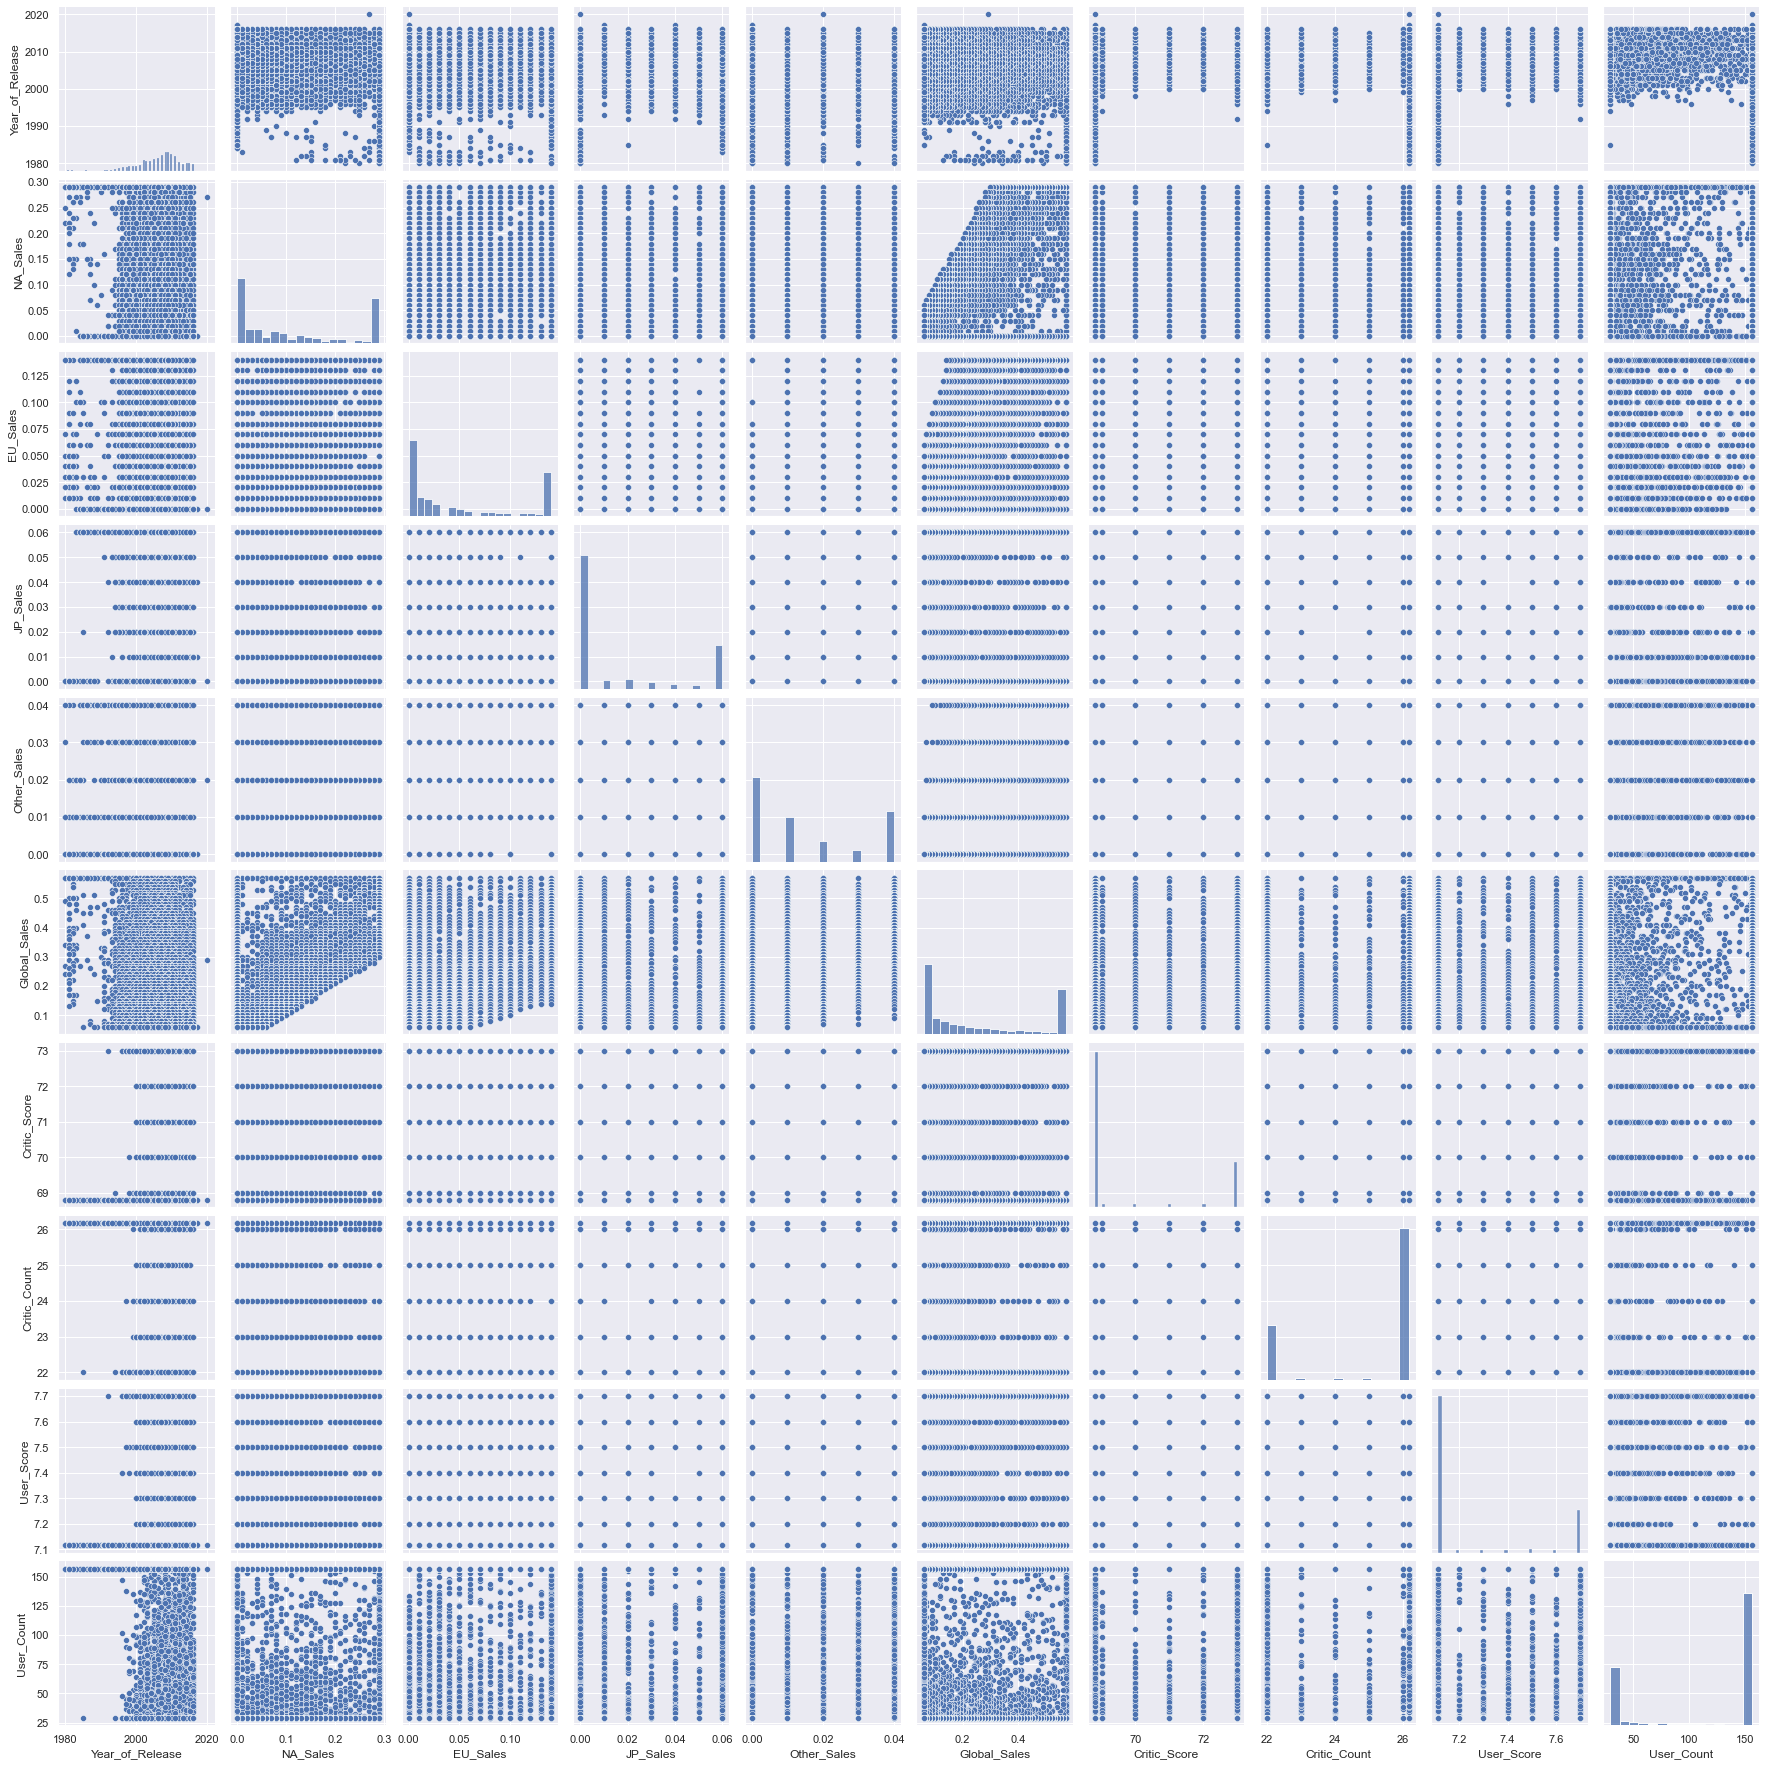

In [119]:
sns.pairplot(df)

## INFERENCE: RELATIONSHIP BETWEEN ONE ATTRIBUTE AND EVERY OTHER ATTRIBUTE IN DATASET

<AxesSubplot:>

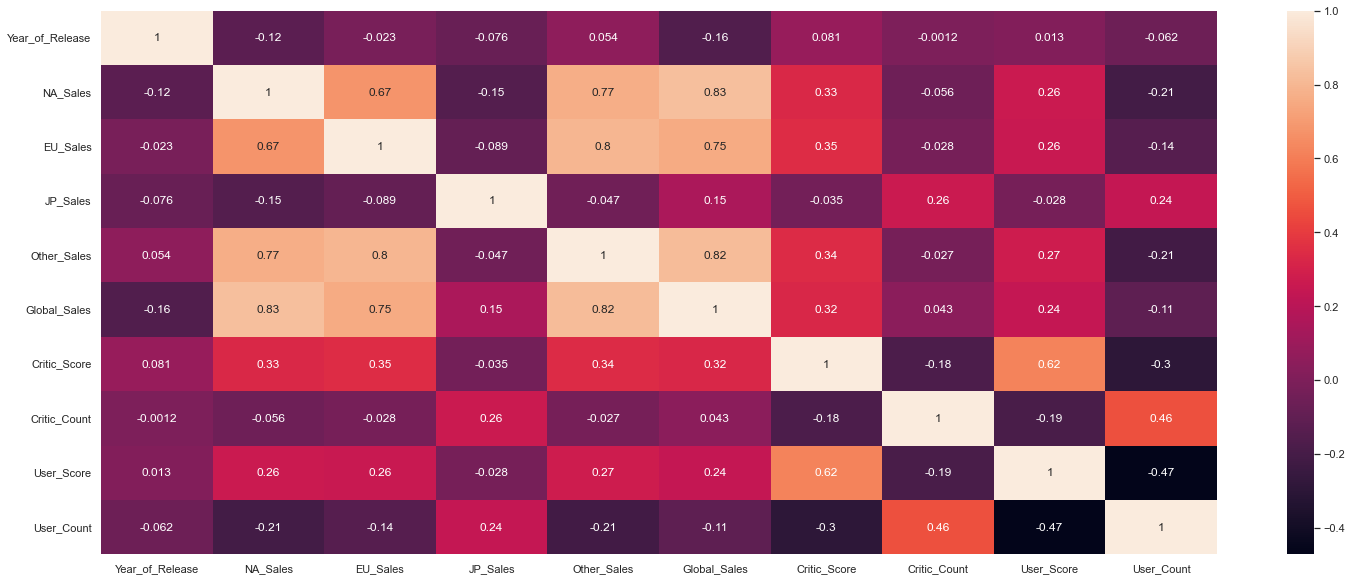

In [121]:
sns.heatmap(df.corr(),annot=True)

## INFERENCE: CORRELATION BETWEEN ALL COMBINATION OF VARIABLES

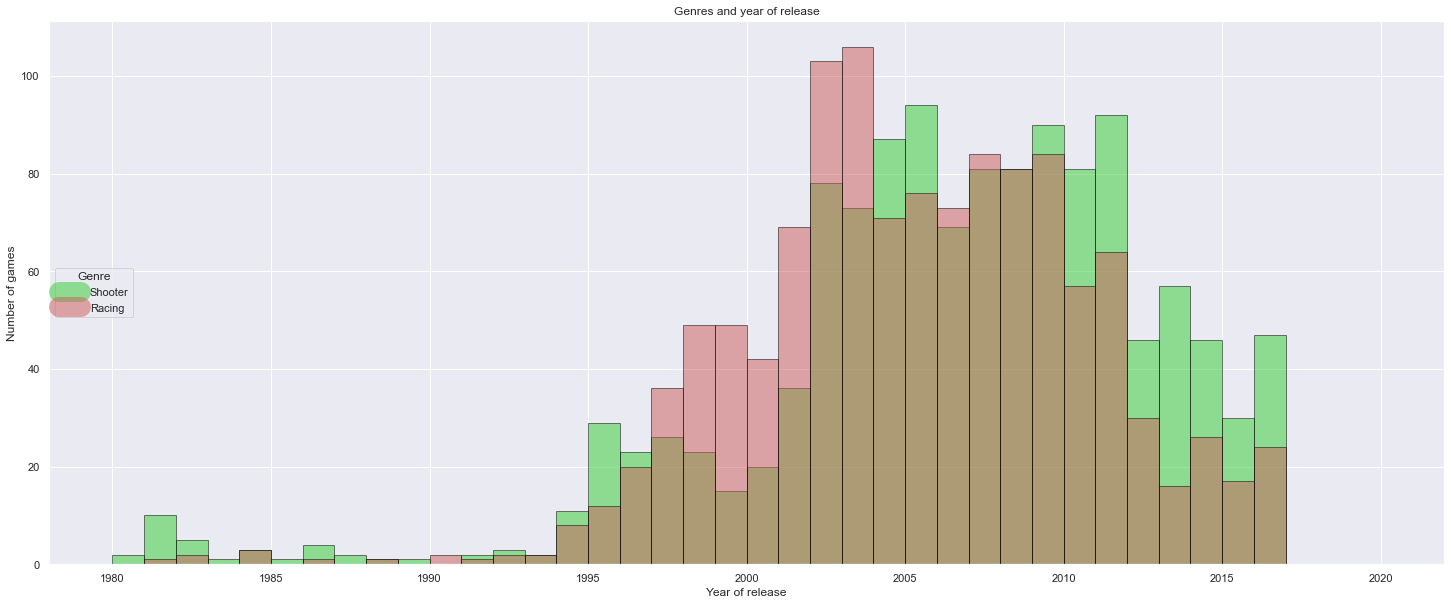

In [123]:
from matplotlib.lines import Line2D
plt.hist(df[df["Genre"]=="Shooter"]["Year_of_Release"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(df[df["Genre"]=="Racing"]["Year_of_Release"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Genres and year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="Shooter", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="Racing", alpha=0.5)],
           title="Genre", loc=6);

## INFERENCE : RACING GAMES ARE SOLD MORE IN THE YEAR 200-2005 WHEREAS SHOOTING GAMES ARE SOLD MORE IN RANGE 2010-2015

## MACHINE LEARNING ALGORITHMS

### LINEAR REGRESSION

<AxesSubplot:>

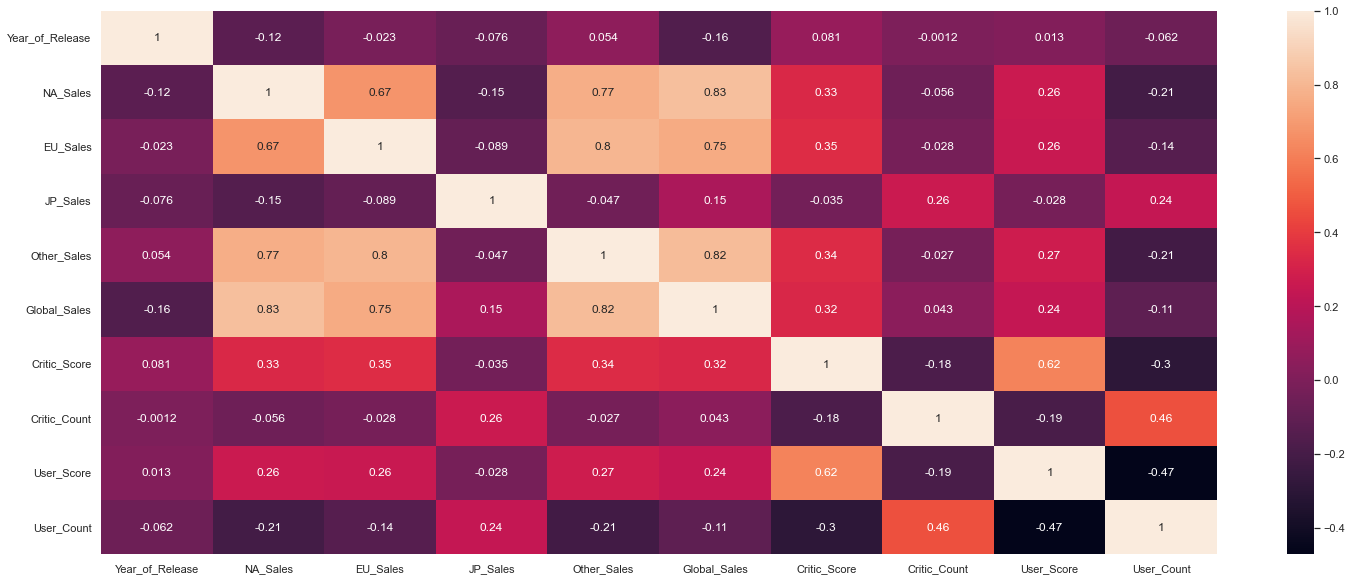

In [125]:
sns.heatmap(df.corr(),annot=True)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
X = df.loc[:,['NA_Sales','JP_Sales','EU_Sales','Other_Sales']]
y=df['Global_Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)
pre=regr.predict(X_test)
r21=regr.score(X_test,Y_test)
df1=pd.concat([X_test,Y_test],axis=1)
df1['Predicted_Global_Sales']=pre
display(df1.head(10))
print("Accuracy obtained in linear regression model is",r21*100,'%')

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,Predicted_Global_Sales
16452,0.00,0.01,0.00,0.00,0.06,0.044019
15511,0.02,0.00,0.00,0.00,0.06,0.041563
10613,0.00,0.06,0.00,0.00,0.10,0.149091
15059,0.02,0.00,0.01,0.00,0.06,0.049753
1383,0.29,0.00,0.14,0.04,0.57,0.531414
8876,0.14,0.00,0.00,0.01,0.15,0.184076
3916,0.29,0.00,0.03,0.04,0.51,0.441321
4527,0.07,0.06,0.05,0.02,0.43,0.317321
259,0.29,0.06,0.14,0.04,0.57,0.657501
10243,0.08,0.00,0.02,0.00,0.11,0.113619


Accuracy obtained in linear regression model is 85.42242595864153 %


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


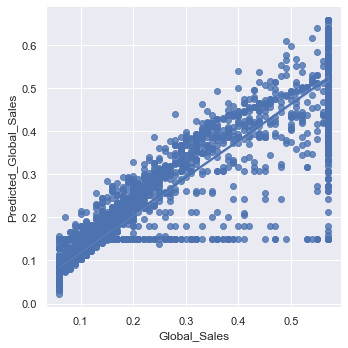

In [127]:
sns.lmplot('Global_Sales','Predicted_Global_Sales',data=df1)

### DECISION TREE

In [128]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree 
X = df[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']]
y=df['Global_Sales']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
score=regressor.score(X_train, Y_train)
df2=pd.concat([X_test,Y_test],axis=1)
df2['Predicted_Global_Sales']=y_pred
display(df2.head(10))
print("Accuracy obtained in decision tree is",score*100,'%')

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Global_Sales,Predicted_Global_Sales
7362,0.10,0.00,0.08,0.03,0.21,0.204839
8789,0.11,0.00,0.03,0.02,0.15,0.166667
6649,0.19,0.00,0.05,0.01,0.25,0.247500
8324,0.00,0.06,0.00,0.00,0.17,0.191520
10604,0.06,0.03,0.00,0.01,0.10,0.100000
14730,0.00,0.00,0.02,0.00,0.06,0.060000
4734,0.00,0.06,0.00,0.01,0.41,0.217447
1371,0.29,0.00,0.14,0.04,0.57,0.569018
1611,0.29,0.06,0.14,0.03,0.57,0.570000
285,0.29,0.06,0.14,0.04,0.57,0.570000


Accuracy obtained in decision tree is 92.58425412678865 %


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


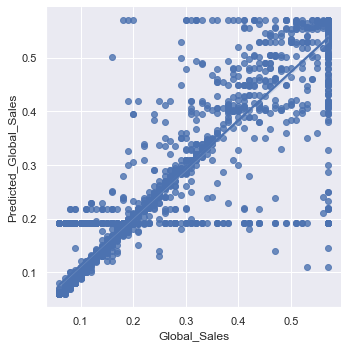

In [129]:
sns.lmplot('Global_Sales','Predicted_Global_Sales',data=df2)

### COMPARATIVE ANALYSIS

In [63]:
ls=[91.39692742600295,96.16516155070882]
ls2=["Linear reg","Decision Tree"]
dp=pd.DataFrame(list(zip(ls2,ls)),columns=["Algorithms","Performance Values"])
dp

,Algorithms,Performance Values
0,Linear reg,91.396927
1,Decision Tree,96.165162


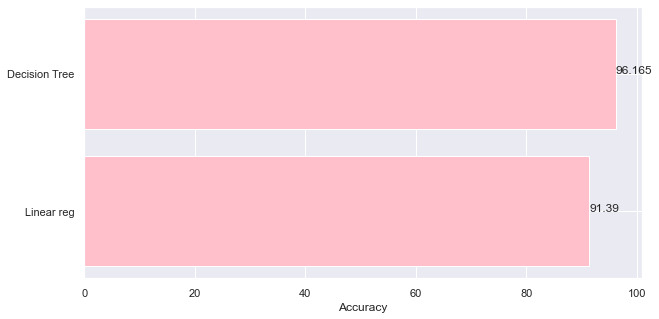

In [109]:
plt.figure(figsize=(10,5))
x=dp['Algorithms']
y=[91.39,96.165]
plt.barh(x, y,color='pink')
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.xlabel("Accuracy")
plt.show()

## DECISION TREE ALGORITHM WORKS BETTER THAN LINEAR REGRESSION FOR THE GIVEN DATASET.